# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- Nama: Dila Aura Futri
- Email: mrkhyuck.dila@gmail.com
- Id Dicoding: dilalovegood

## Menentukan Pertanyaan Bisnis

- Apa saja nama produk apa yang menjadi 5 top brand penjualan?
- Kota dari negara bagian mana yang memiliki frekuensi pembelian tertinggi?
- Tahun berapa penjualan produk mengalami penurunan?
- Berapa rata-rata waktu sejak pelanggan terakhir melakukan pembelian?
- Seberapa sering seorang customer melakukan pembelian produk?
- Berapa banyak uang yang dihabiskan oleh customer dalam 1 bulan terakhir?


## Menyiapkan semua library yang dibutuhkan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [3]:
customer = pd.read_csv("https://raw.githubusercontent.com/Dilalovegood/My-Data-Project/master/customers_dataset.csv")
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
order = pd.read_csv("https://raw.githubusercontent.com/Dilalovegood/My-Data-Project/master/orders_dataset.csv")
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
order_items = pd.read_csv("https://raw.githubusercontent.com/Dilalovegood/My-Data-Project/master/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
product = pd.read_csv("https://raw.githubusercontent.com/Dilalovegood/My-Data-Project/master/products_dataset.csv")
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Assessing Data

In [7]:
# Menilai dataset customer
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
print("Jumlah duplikasi: ", customer.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
customer.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [10]:
# Menilai dataset order
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [12]:
print("Jumlah duplikat: ", order.duplicated().sum())

Jumlah duplikat:  0


In [13]:
order.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [14]:
# Menilai data order item
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
print("Jumlah duplikat: ", order_items.duplicated().sum())

Jumlah duplikat:  0


In [16]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [17]:
# Menilai data produk
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [18]:
product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [19]:
print("Jumah duplikat: ", product.duplicated().sum())

Jumah duplikat:  0


In [20]:
product.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


Hasil Asessing Data:
1. Dalam tabel customer_dataset terdapat 99441 baris dan 5 kolom dalam. Tidak ada duplikasi dan tidak ada missing value di dalam data frame.
2. Tabel orders_dataset memiliki 99441 baris dan 8 kolom. Beberapa nilai kosong terdapat di dalamnya, khususnya pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date dikarenakan pesanan ada ynag belum di approved, belum sampai ke kurir, dan belum sampai. Selain itu, terdapat kesalahan tipe data dalam 5 kolom, yang seharusnya bertipe data datetime pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.
3. Pada dataframe order_items ada kesalahan tipe data pada kolom shipping_limit_date seharusnya bertipe data datetime.
4. Pada products_dataset terdapat missing value pada 8 kolom diantaranya kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm,product_height_cm, dan product_width_cm.

### Cleaning Data

In [21]:
# membersihkan data customer
customer.drop("customer_zip_code_prefix", axis=1, inplace=True)

In [22]:
customer.describe()

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [23]:
# memperbaiki tipe data order
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  order[column] = pd.to_datetime(order[column])

order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [24]:
# memperbaiki tipe data order item
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items[column] = pd.to_datetime(order_items[column])

order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [25]:
# Membersihkan Data Product
product.dropna(inplace=True)
product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [26]:
product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

In [27]:
# EDA Data Customer
customer.describe(include="all")

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [28]:
customer.customer_id.is_unique

True

In [29]:
customer.groupby(by="customer_city").customer_unique_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
                  ...  
ibertioga             1
ibiajara              1
ibiara                1
ibicuitinga           1
lagoao                1
Name: customer_unique_id, Length: 4119, dtype: int64

In [30]:
customer.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

In [31]:
# EDA data order
order.describe(include="all", datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [32]:
order['durasi_pengiriman'] = (order['order_delivered_customer_date'] - order['order_delivered_carrier_date']).dt.days
order.describe(include="all", datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,durasi_pengiriman
count,99441,99441,99441,99441,99281,97658,96476,99441,96475.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,8.878310
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-17.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,12.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,205.000000


In [33]:
order.groupby(by=['order_id', 'durasi_pengiriman']).order_id.nunique().sort_values(ascending=False)

order_id                          durasi_pengiriman
00010242fe8c5a6d1ba2dd792cb16214  1.0                  1
ab2e18197d676ace96bcaab0aeb2a820  12.0                 1
ab30f8d4ebb7d33d1dcf54d420ea42cd  7.0                  1
ab30f399d360ddf62897051d813f887d  17.0                 1
ab30819331b8ee6115370bcfa01a8350  5.0                  1
                                                      ..
555b96fab13352cfb0199d765806f364  9.0                  1
555abbd521ea234b5a6b908bb132244b  39.0                 1
5559edd02dabfec0a6ee808960297d1b  19.0                 1
55595283657c40a4e48711b28049056e  10.0                 1
fffe41c64501cc87c801fd61db3f6244  3.0                  1
Name: order_id, Length: 96475, dtype: int64

In [34]:
# Menghitung durasi pengiriman
durasi_pengiriman_stats = order.groupby('order_id')['durasi_pengiriman'].agg(['min', 'max', 'mean']).reset_index()

# Menampilkan nilai minimal, maksimal, dan rata-rata durasi pengiriman
min_durasi = durasi_pengiriman_stats['min'].min()
max_durasi = durasi_pengiriman_stats['max'].max()
mean_durasi = durasi_pengiriman_stats['mean'].mean()

print(f"Minimal Durasi Pengiriman: {min_durasi} hari")
print(f"Maksimal Durasi Pengiriman: {max_durasi} hari")
print(f"Rata-rata Durasi Pengiriman: {mean_durasi} hari")

Minimal Durasi Pengiriman: -17.0 hari
Maksimal Durasi Pengiriman: 205.0 hari
Rata-rata Durasi Pengiriman: 8.878310443119979 hari


In [35]:
#Mengurutkan data berdasarka status pesanan
order.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [36]:
#menghitung data pesanan setiap bulan
order['order_month']= order['order_purchase_timestamp'].dt.to_period('M')
order_bulanan = order.groupby('order_month').size()
order_bulanan_sorted = order_bulanan.sort_values(ascending=False)
order_bulanan


order_month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, dtype: int64

In [37]:
# Menambahkan kolom order_year ke dalam DataFrame
order['order_year'] = order['order_purchase_timestamp'].dt.year

# Menghitung data pesanan setiap tahun
order_tahunan = order.groupby('order_year').size()
order_tahunan = order_tahunan.sort_values(ascending=True)
order_tahunan



order_year
2016      329
2017    45101
2018    54011
dtype: int64

In [38]:
# EDA data customer dan order
order_customer = pd.merge(
    left=order,
    right=customer,
    how="left",
    left_on = "customer_id",
    right_on = "customer_id"
)
order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,durasi_pengiriman,order_month,order_year,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,2017-10,2017,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,2018-07,2018,af07308b275d755c9edb36a90c618231,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,2018-08,2018,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,2017-11,2017,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,2018-02,2018,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP


In [39]:
# Jumlah order based on city and SSTATE

order_customer.groupby(['customer_city', 'customer_state'])['order_id'].nunique().sort_values(ascending=False).reset_index().head()

,customer_city,customer_state,order_id
0,sao paulo,SP,15540
1,rio de janeiro,RJ,6882
2,belo horizonte,MG,2773
3,brasilia,DF,2131
4,curitiba,PR,1521


In [40]:
# EDA data Item
order_items.describe(include="all", datetime_is_numeric=True)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [41]:
#melakukan perhitungan setiap order item id dengan total price dan menambahkan kolom baru 'total_price'
total_order_item = order_items["price"] * order_items["order_item_id"]
total_freight = order_items["freight_value"] * order_items["order_item_id"]
order_items["total_price"] = total_order_item + total_freight

order_items.describe(include="all", datetime_is_numeric=True)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320,160.304175
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,6.080000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000,61.070000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000,103.550000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000,175.870000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,13664.080000


In [42]:
#melakukan pengurutan order berdasarkan kolom total price secara menurun (descending)
order_items.sort_values(by="total_price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
1654,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,13664.08
1653,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,11956.07
1652,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,10248.06
1651,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,2017-10-06 15:28:20,1680.0,28.01,8540.05
50771,736e1922ae60d0d6a89247b851902527,4,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,2018-07-23 04:31:36,1790.0,28.72,7274.88
...,...,...,...,...,...,...,...,...
106405,f1d5c2e6867fa93ceee9ef9b34a53cbf,1,46fce52cef5caa7cc225a5531c946c8b,2d2322d842118867781fc737e96d59a1,2018-08-28 21:30:15,2.2,7.39,9.59
46235,69077141219d094a1413c873be09cc9c,1,a25583531530c0913ea4dee2c5c73685,4e06067cc08b3f41d837768d392c3ee3,2017-10-24 17:14:18,7.0,2.56,9.56
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,9.09
50114,71e22e2d99081d6dc07d9627bb85969e,1,ac480ada5f06d9024eae2c6dd9de4c74,4e06067cc08b3f41d837768d392c3ee3,2018-01-30 22:56:25,7.0,0.28,7.28


In [43]:
#melakukan pengurutan order berdasarkan kolom price atau harga secara menurun (descending)
order_items.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,6929.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,6922.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,6726.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,4950.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,4764.34
...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,72.72
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,36.36
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,19.08
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,19.08


In [44]:
#melakukan pengurutan order berdasarkan kolom freight value atau ongkir secara menurun (descending)
order_items.sort_values(by="freight_value", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68,1388.68
28044,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28,2713.36
3303,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28,2713.36
69797,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59,1488.59
16731,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30,1388.30
...,...,...,...,...,...,...,...,...
25980,3b10c12d389da3bd306ab31f1867c754,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-02 20:31:14,99.90,0.00,99.90
23857,365929ae2a3877d3590589ad75b39d20,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-14 20:54:48,99.90,0.00,99.90
107758,f4e4e886a056bb9c7ed4a19c013a833d,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-09 16:29:23,99.90,0.00,99.90
74348,a968af310ab09611023e0efd828ecbde,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-17 17:50:55,115.00,0.00,115.00


In [45]:
# EDA data produk dan data items
product_order_items = pd.merge(
    left=product,
    right=order_items,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_order_items.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,total_price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,18.30
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,265.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,87.62
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,121.84
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,46.19


In [46]:
# agregasi produk order item berdasarkan ktegor produk, totalproce dan freigth value
product_order_items.groupby(by="product_category_name").agg({
    "product_id":"nunique",
    "price":["min","max"],
    "freight_value":["min","max"]
})

product_id  price          freight_value        
                             nunique    min      max           min     max
product_category_name                                                     
agro_industria_e_comercio         74  12.99  2990.00          7.39  194.55
alimentos                         82   9.99   274.99          2.97   58.84
alimentos_bebidas                104   6.50   699.90          0.76   58.78
artes                             55   3.50  6499.00          7.39  227.66
artes_e_artesanato                19   9.80   289.49          7.39   68.72
...                              ...    ...      ...           ...     ...
sinalizacao_e_seguranca           93   4.50   740.00          5.75  299.16
tablets_impressao_imagem           9  14.90   889.99          1.71   34.49
telefonia                       1134   5.00  2428.00          0.01  121.22
telefonia_fixa                   116   6.00  1790.00          7.39   77.22
utilidades_domesticas           2335   3.06  6735.00          0.02  375.28

[73 rows x 5 columns]

In [47]:
# mengelompokan data produk order item berdasarkan ketegori produk
product_order_items.groupby(by="product_category_name").agg({
    "order_id":"nunique",
    "total_price": "sum"
}).sort_values(by="order_id", ascending=False)

,order_id,total_price
product_category_name,,
cama_mesa_banho,9417,1476978.29
beleza_saude,8836,1550390.76
esporte_lazer,7720,1273378.77
informatica_acessorios,6689,1318344.53
moveis_decoracao,6449,1161268.62
...,...,...
la_cuisine,13,2590.41
cds_dvds_musicais,12,1077.21
pc_gamer,8,2058.24


In [48]:
# Menggabungkan DataFrame 'order_items' dengan 'products' berdasarkan kolom 'product_id'
product_order_items = pd.merge(order_items, product, on='product_id')
product_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,73.86,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,83.23,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,75.07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [49]:
# menghitung jumlah prduk yang sudah terjual berdasarkan kategori produk

top_product = product_order_items['product_category_name'].value_counts().reset_index().rename(columns={'index': 'product_category_name', 'product_category_name': 'count'}).head()
top_product

,product_category_name,count
0,cama_mesa_banho,11115
1,beleza_saude,9670
2,esporte_lazer,8641
3,moveis_decoracao,8334
4,informatica_acessorios,7827


In [50]:
# EDA all data
all_data = pd.merge(
    left=product_order_items,
    right=order_customer,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,product_category_name,product_name_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,durasi_pengiriman,order_month,order_year,customer_unique_id,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,72.19,cool_stuff,58.0,...,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,2017-09,2017,871766c5855e863f6eccc05f988b23cb,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,73.86,cool_stuff,58.0,...,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26,8.0,2017-06,2017,0fb8e3eab2d3e79d92bb3fffbb97f188,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,83.23,cool_stuff,58.0,...,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07,12.0,2018-05,2018,3419052c8c6b45daf79c1e426f9e9bcb,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,75.07,cool_stuff,58.0,...,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25,7.0,2017-08,2017,e7c828d22c0682c1565252deefbe334d,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,72.19,cool_stuff,58.0,...,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01,13.0,2017-08,2017,0bb98ba72dcc08e95f9d8cc434e9a2cc,conselheiro lafaiete,MG


In [51]:
# Ringkasan statistik data dengan aggregate pada semua data berdasarkan cutomer satte dan ketgori produk kemudian hitung total pricenya
all_data.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_id":"nunique",
    "total_price":"sum"
}).sort_values(by="order_id", ascending=False)

order_id  \
customer_state product_category_name                                      
SP             cama_mesa_banho                                     4416   
               beleza_saude                                        3789   
               esporte_lazer                                       3296   
               utilidades_domesticas                               2781   
               moveis_decoracao                                    2724   
...                                                                 ...   
PB             audio                                                  1   
               artes                                                  1   
PA             telefonia_fixa                                         1   
               sinalizacao_e_seguranca                                1   
               moveis_cozinha_area_de_servico_jantar_e_jardim         1   

                                                               total_price  
customer_state product_category_name                                        
SP             cama_mesa_banho                                   660995.34  
               beleza_saude                                      567961.70  
               esporte_lazer                                     481283.03  
               utilidades_domesticas                             386780.04  
               moveis_decoracao                                  444376.75  
...                                                                    ...  
PB             audio                                                103.55  
               artes                                                154.18  
PA             telefonia_fixa                                       614.49  
               sinalizacao_e_seguranca                              516.12  
               moveis_cozinha_area_de_servico_jantar_e_jardim        86.80  

[1368 rows x 2 columns]

1. Customer paling banyak berasal dari Kota Sao Paulo sebanyak 14984
Customer paling banyak berasal dari State/Negara Bagian SP (Sao Paulo) sebanyak 40302
2. Menambahkan kolom delivered_duration di tabel orders_df, digunakan untuk mengetahui waktu paket diterima customer
3. Sebanyak 96478 paket sudah terkirim, 1107 paket masih di perjalanan, 625 paket dibatalkan, dll
4. Orderan paling banyak ada pada tahun 2017 bulan 11 sebanyak 7544
5. Melakukan penggabungan (left join) tabel customer dan order
6. Kota paling banyak melakukan order adalah Sao Paulo dengan order sebanyak 15540
7. Menambahkan kolom total_order_item pada tabel orders_items_dataset dengan nilai total yang dihitung berdasarkan harga barang (price) tertinggi sebesar 6735.00 dan biaya pengiriman (freight_value) tertinggi sebesar 409.68.
8. Transaksi dengan nilai tertinggi dalam kolom total_price sebesar 13664.08.
9. Melakukan penggabungan (left join) tabel product dan order_items
10. Melakukan agregasi pada produk_order_item berdasarkan kategori produk dan menghitung total_price dan freight_value
11. Mengetahui cama_mesa_banho adalah kategori produk paling banyak terjual yaitu sebanyak 11115
12. Penjualan paling down terjadi pada tahun 2016
13. Melakukan penggabungan (left join) pada semua tabel

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Apa saja nama produk yang menjadi 5 top brand penjualan?

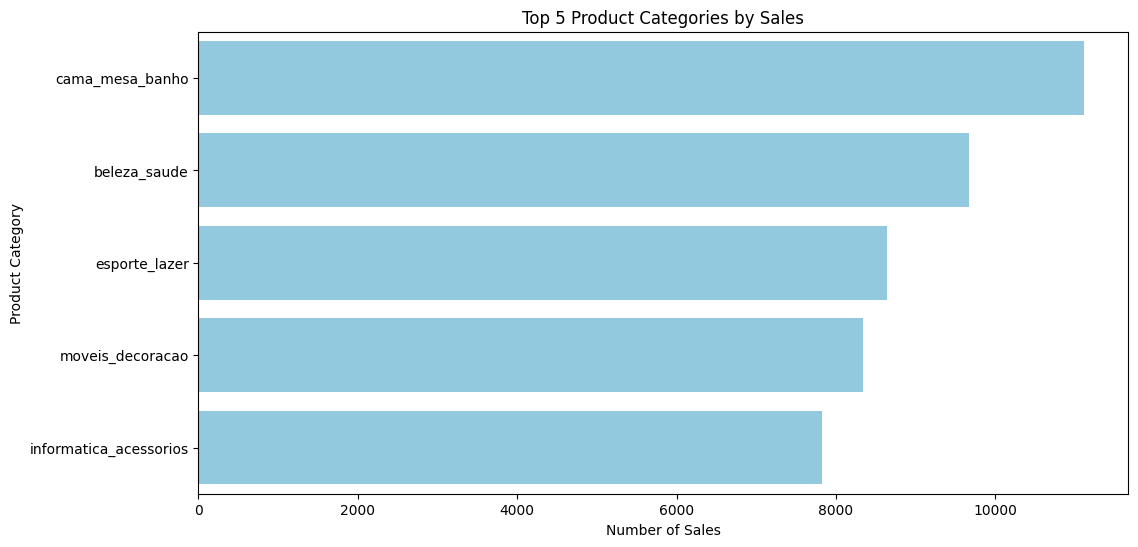

In [52]:
# Visualisasi Kategori produk 5 top best seller nama produk menggunakan bar chart

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='product_category_name', data=top_product, color='skyblue')
plt.title('Top 5 Product Categories by Sales')
plt.xlabel('Number of Sales')
plt.ylabel('Product Category')
plt.show()


## Pertanyaan 2:
Kota dari negara bagian mana yang memiliki frekuensi pembelian tertinggi?

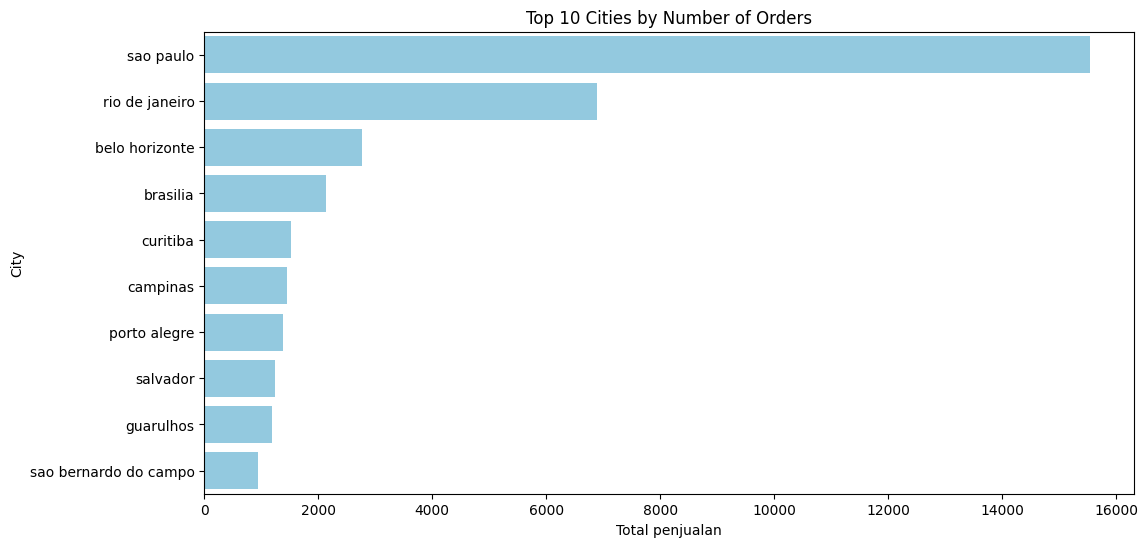

In [53]:
# Visualisasi kota dengan pelanggan tertinggi
order_city_state = order_customer.groupby(['customer_city', 'customer_state'])['order_id'].nunique().reset_index()

# Mengurutkan data berdasarkan jumlah order secara descending
order_city_state_sorted = order_city_state.sort_values(by='order_id', ascending=False).head(10)

# Plotting data
plt.figure(figsize=(12, 6))
sns.barplot(x='order_id', y='customer_city', data=order_city_state_sorted, color='skyblue')
plt.title('Top 10 Cities by Number of Orders')
plt.xlabel('Total penjualan')
plt.ylabel('City')
plt.show()

### Pertanyaan 3:
Tahun berapa penjualan produk mengalami penurunan?

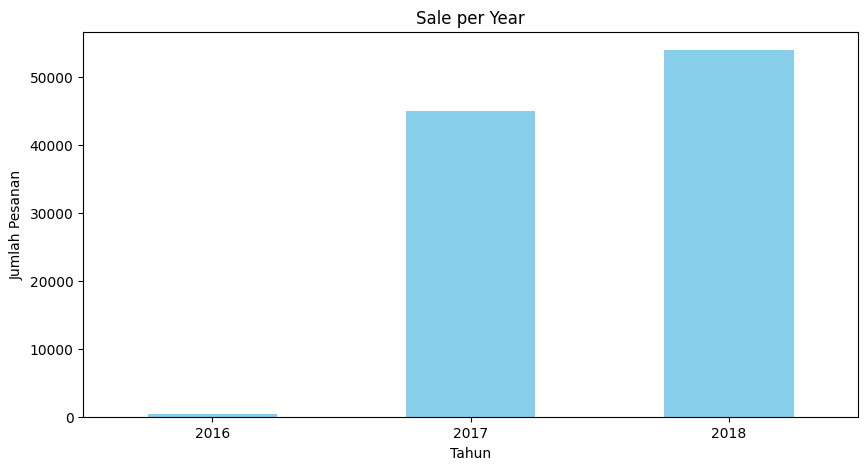

In [54]:
# Total penjualan per tahun
plt.figure(figsize=(10, 5))
order_tahunan.plot(kind='bar', color='skyblue')
plt.title('Sale per Year')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=0)

plt.show()

In [55]:
#Vieweing data only for 2016
order[order['order_purchase_timestamp'].dt.year==2016]

#order['order_month']= order['order_purchase_timestamp'].dt.to_period('M')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,durasi_pengiriman,order_month,order_year
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,NaN,2016-10,2016
378,cbbb524a0e1646aa6cf7a3c0bbe517ad,dacb079d55ffb1d3955c5d923df3ebb7,delivered,2016-10-05 07:31:49,2016-10-06 02:46:24,2016-10-10 02:46:24,2016-10-16 14:36:00,2016-12-07,6.0,2016-10,2016
699,ac2b7c522d811acba0aa270ed3e112e4,ef21aebbb093a6db29ccc6aa0b89c347,delivered,2016-10-05 15:08:00,2016-10-06 15:44:26,2016-10-10 15:44:27,2016-10-13 15:44:27,2016-11-29,3.0,2016-10,2016
1384,7033745709b7cf1bac7d2533663592de,7f0ca17bb33b230b47459437cf0682c7,delivered,2016-10-04 14:13:22,2016-10-04 14:46:48,2016-10-08 14:46:49,2016-10-11 14:46:49,2016-11-30,3.0,2016-10,2016
1449,5cd498954e2b37d71b315166809b4bd7,ff1a56726b7ea149c7423865609cc0c8,delivered,2016-10-07 00:54:40,2016-10-08 03:56:15,2016-10-25 11:35:52,2016-10-27 17:32:07,2016-12-01,2.0,2016-10,2016
...,...,...,...,...,...,...,...,...,...,...,...
98322,6e0d2539e48e84296bae6290de41058c,1fc56719b52f82c03caddc5faf531fbb,delivered,2016-10-04 19:41:52,2016-10-06 15:51:37,2016-11-10 16:47:52,2016-11-17 09:23:50,2016-11-30,6.0,2016-10,2016
98484,9d664ec86be69d869bb6870294c4fdd8,0a9ee4d9030acbe428769c79d0c4da69,delivered,2016-10-08 15:02:10,2016-10-08 19:55:50,2016-10-12 19:55:50,2016-10-31 11:35:45,2016-12-12,18.0,2016-10,2016
99035,7e2dddf174cc4d2768bf39c43ab2bd7a,accfbaa1f092fdf6db1d8fcdad351b50,delivered,2016-10-09 15:10:41,2016-10-10 05:54:51,2016-11-03 07:43:55,2016-11-10 09:27:42,2016-12-02,7.0,2016-10,2016
99248,e439ced3d48f1a77f6ecc029cc946a6f,e9c6723e04c4e53e7e9c3afe383f3866,delivered,2016-10-07 22:35:59,2016-10-07 22:59:53,2016-10-15 10:31:09,2016-10-25 21:15:45,2016-12-01,10.0,2016-10,2016


## Pertanyaan :
4. Berapa rata-rata waktu sejak pelanggan terakhir melakukan pembelian?
5. Seberapa sering seorang customer melakukan pembelian produk?
6. Berapa banyak uang yang dihabiskan oleh customer dalam 1 bulan terakhir?

In [56]:
rfm_df = all_data.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = order["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,163
2,0000f46a3911fa3c0805444483337064,1,86.22,586
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,370
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,337


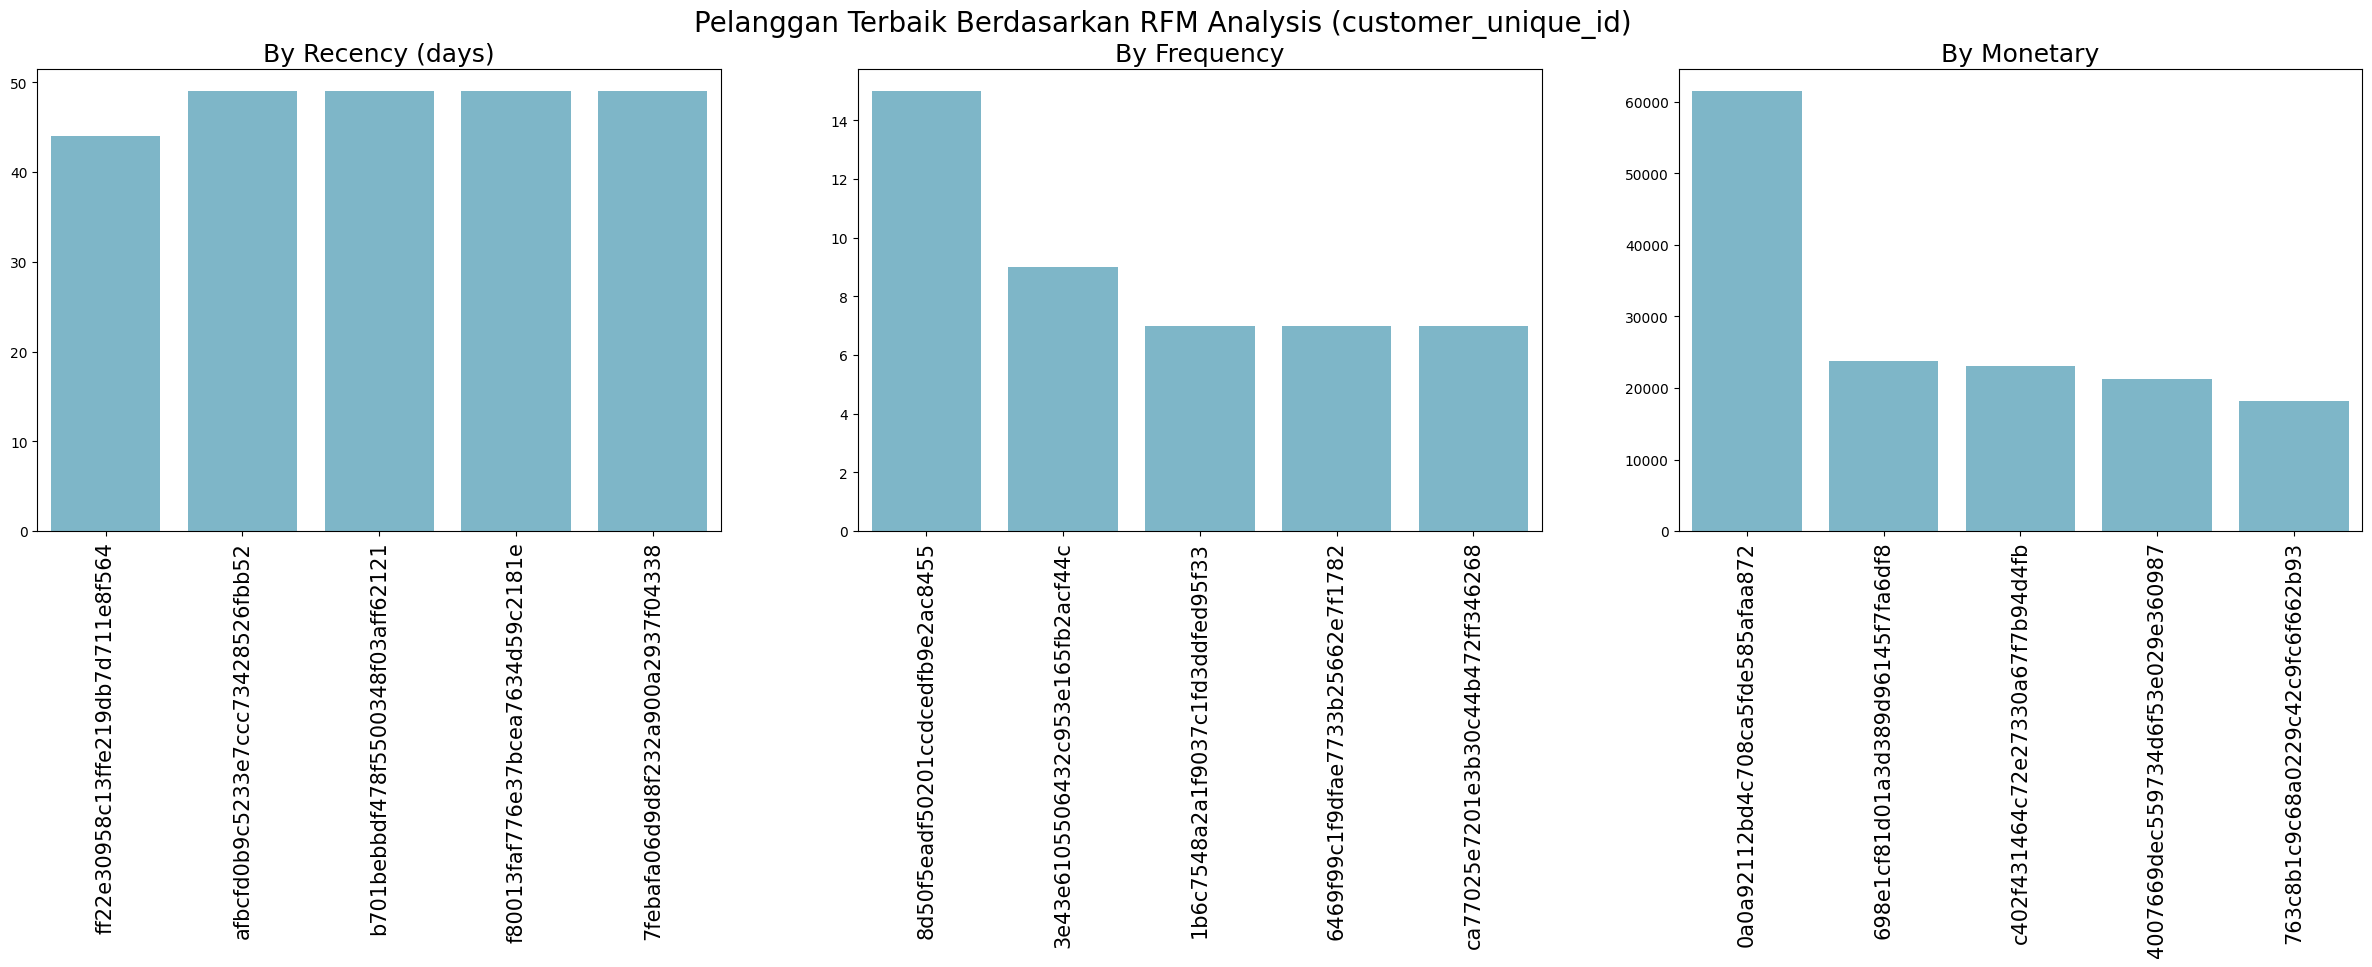

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_unique_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)  # Atur rotasi label sumbu x

sns.barplot(y="frequency", x="customer_unique_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)  # Atur rotasi label sumbu x

sns.barplot(y="monetary", x="customer_unique_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90)  # Atur rotasi label sumbu x

plt.suptitle("Pelanggan Terbaik Berdasarkan RFM Analysis (customer_unique_id)", fontsize=20)
plt.show()

## Conclusion

- Kategori produk yang paling diminati atau paling sering dibeli adalah "cama mesa banho" berdasarkan data penjualan yang diamati yaitu sebanyak 11115
- Terdapat tren peningkatan pesanan dari tahun 2016 hingga 2017 dan 2018. Meskipun terdapat fluktuasi bulanan, secara keseluruhan terjadi peningkatan jumlah pesanan dari tahun ke tahun.
- Sao Paulo dan Rio de Janeiro merupakan kota dengan jumlah pelanggan terbanyak. Sao Paulo memiliki jumlah pelanggan yang signifikan lebih tinggi dibandingkan dengan kota lainnya, dengan total 14984 pelanggan. Rio de Janeiro, dengan 6620 pelanggan, merupakan kota kedua dengan jumlah pelanggan yang signifikan.
- Mayoritas pelanggan melakukan transaksi terakhir kurang dari 50 hari yang lalu, menunjukkan adanya aktivitas belanja yang relatif baru.
- Dari data transaksi, diketahui bahwa pelanggan dengan ID 8d50f5eadf50201ccdcedfb9e2ac8455 merupakan salah satu pelanggan yang sangat aktif, dengan melakukan transaksi sebanyak 16 kali.
- Dalam hal pendapatan (revenue), terbesar tercatat berasal dari pelanggan dengan ID 0a0a92112bd4c708ca5fde585afaa872, menunjukkan kontribusi signifikan dari pelanggan tersebut dalam total pendapatan perusahaan.


In [58]:
all_data.to_csv("all_data.csv", index=False)

In [61]:
order.to_csv("order_dataset.csv", index=False)